In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('Data.xlsx')
df.head(10)

,area,sq_meters,room_number,price
0,Opština Stari grad,50 m2,2.0,950€
1,Opština Novi Beograd,75 m2,3.0,800€
2,Opština Zvezdara,39 m2,1.5,450€
3,Opština Zvezdara,40 m2,1.5,700€
4,Opština Voždovac,80 m2,2.0,500€
5,Opština Vračar,75 m2,3.0,950€
6,Opština Novi Beograd,75 m2,2.5,780€
7,Opština Rakovica,45 m2,2.0,360€
8,Opština Voždovac,54 m2,2.0,850€
9,Opština Palilula,69 m2,3.0,1.250€


In [41]:
df = df.dropna(subset=['area'])
df['price'] = df['price'].str.replace('€', '').str.replace('.', '')
df['sq_meters'] = df['sq_meters'].str.replace(' m2', '').str.replace(',', '.')
df['room_number'] = df['room_number'].str.replace('+', '')
df[['price', 'sq_meters', 'room_number']] = df[['price', 'sq_meters', 'room_number']].astype(float)
df['area'] = df['area'].astype(str)
df['area'] = df['area'].str.replace('Opština ', '')
df = df[df['price'] < 2000]
df = df.sort_values(by=['price'])
df.describe()

C:\Users\marko\AppData\Local\Temp/ipykernel_21404/1668361618.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('€', '').str.replace('.', '')
C:\Users\marko\AppData\Local\Temp/ipykernel_21404/1668361618.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['room_number'] = df['room_number'].str.replace('+', '')


,sq_meters,room_number,price
count,527.000000,527.000000,527.000000
mean,63.329241,2.352941,875.119545
std,27.453454,0.907670,404.456330
min,15.000000,0.500000,190.000000
25%,45.000000,2.000000,550.000000
50%,60.000000,2.000000,800.000000
75%,76.500000,3.000000,1175.000000
max,320.000000,5.000000,1950.000000


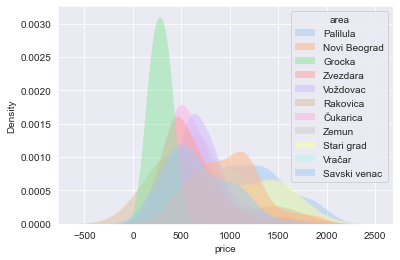

In [42]:
# Distribution check per area
sns.set_style("darkgrid")
sns.set_palette("pastel")

sns.kdeplot(
    data = df,
    x = df['price'],
    hue=df['area'],
    fill=True, 
    common_norm=False, 
    palette="pastel",
    alpha=.5, 
    linewidth=0,
)
plt.show()

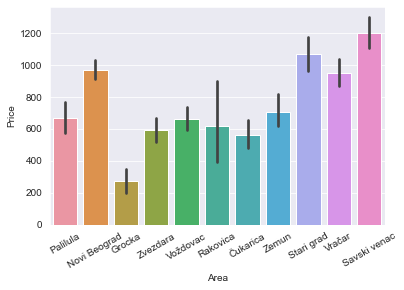

In [43]:
# Mean price per area
sns.barplot(
    data= df,
    x = df['area'],
    y = df['price'],
)
plt.xlabel('Area')
plt.ylabel('Price')
plt.xticks(rotation = 30)
plt.show()